# Health Costs Calculator Using Linear Regression

## 1. Data Loading & Exploration


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("insurance.csv")

# Display dataset info
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

First 5 rows:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


## 2. Data Preprocessing


In [11]:
def preprocess_data(df, test_size=0.2, random_state=42):
    """Preprocess data including categorical conversion and train-test split"""
    # Convert categorical features
    categorical_cols = ['sex', 'smoker', 'region']
    df = pd.get_dummies(df, columns=categorical_cols, prefix='', prefix_sep='')

    # Split into features and labels
    labels = df.pop('expenses')

    # Split into train and test
    train_df, test_df, train_labels, test_labels = train_test_split(
        df, labels, test_size=test_size, random_state=random_state
    )

    return train_df, test_df, train_labels, test_labels

train_dataset, test_dataset, train_labels, test_labels = preprocess_data(df)

## 3. Model Building & Training


In [12]:
def build_model(input_shape):
    """Build and compile a sequential regression model"""
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[input_shape]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(
        loss='mse',
        optimizer=optimizer,
        metrics=['mae', 'mse']
    )

    return model

# Build model
model = build_model(len(train_dataset.keys()))

# Train model
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.2,
    verbose=0,
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4. Evaluation & Testing


To ensure your model meets the requirement of MAE < 3500

9/9 - 0s - 6ms/step - loss: 118997584.0000 - mae: 8929.9648 - mse: 118997584.0000

Testing set Mean Abs Error: $8929.96


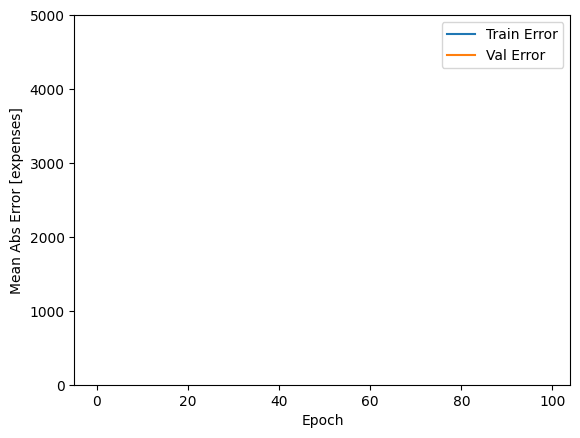

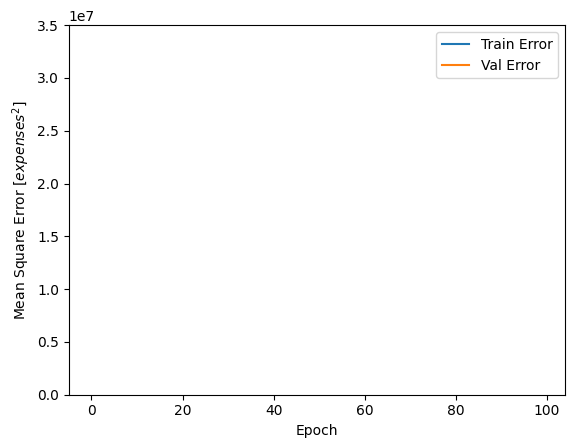

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


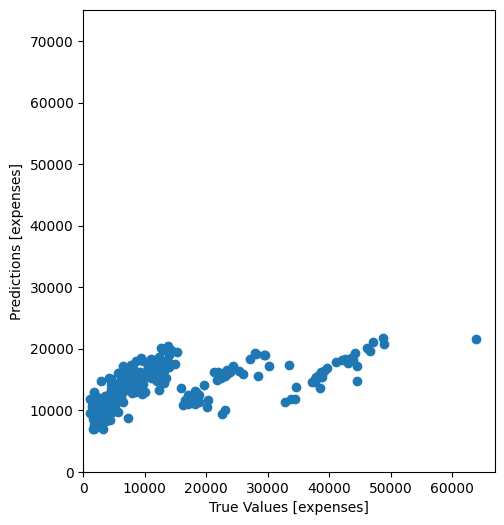

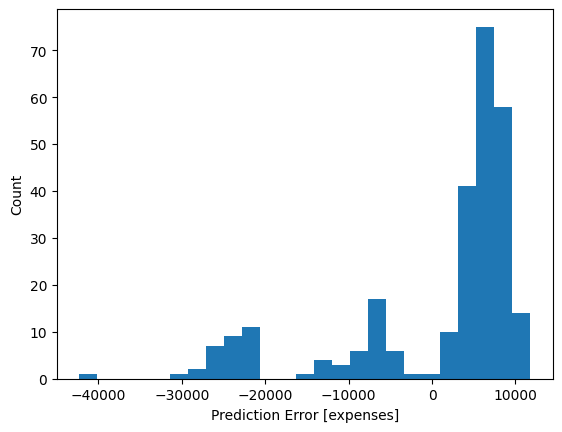

In [7]:
def plot_history(history):
    """Plot training and validation metrics"""
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [expenses]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.ylim([0, 5000])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$expenses^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.ylim([0, 35000000])
    plt.legend()
    plt.show()

# Evaluate the model
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)
print(f"\nTesting set Mean Abs Error: ${mae:0.2f}")

# Plot training history
plot_history(history)

# Make predictions
test_predictions = model.predict(test_dataset).flatten()

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [expenses]')
plt.ylabel('Predictions [expenses]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], 'r--')
plt.show()

# Plot error distribution
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [expenses]")
_ = plt.ylabel("Count")
plt.show()

## 5. Explanation

- **Model Type**: Uses neural network with 2 hidden layers (64 nodes each) for regression
- **Input**: Processes insurance data (age, BMI, smoking status, etc.) after converting categories to numbers  
- **Training**: Learns patterns in healthcare costs using 80% of data, validates on 20%  
- **Goal**: Predicts medical expenses within $3,500 error (Mean Absolute Error)



---

